<a href="https://colab.research.google.com/github/abhinavtk1/ED5340-Codes/blob/main/MA23M002_LAB9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB 9: Gradient Descent Method


2. Using steepest gradient descent, find all the local minima for the function  J(x1, x2) = (x1^2+x2−11)^2+(x1+x2^2−7)^2. While applying gradient descent, do the following (a) Fixing the value for alpha (b) use line search to determine the value for alpha. Plot the intermediate steps in the iteration to show one of the minimal point.

In [60]:
import numpy as np
# Given function
def J(x):
  x1 = x[0]
  x2 = x[1]
  return (x1**2 + x2 - 11)**2 + (x1 + x2**2 - 7)**2

# Gradient of the function
def dJ(x):
  x1 = x[0]
  x2 = x[1]
  dJ1 = 4*(x1**2+x2-11)*x1 + 2*(x1+x2**2-7)
  dJ2 = 2*(x1**2+x2-11) + 4*(x1+x2**2-7)*x2
  return np.array([dJ1, dJ2])

In [108]:
# (a) Steepest descent using fixed alpha
def sgd(J, dJ, init_pt, alpha, tol):
  curr_point = init_pt
  gradJ = dJ(curr_point)
  intd_steps = [np.array(curr_point)]     # List to store intermediate steps
  while np.linalg.norm(gradJ)>tol:
    curr_point = curr_point - alpha*gradJ
    gradJ = dJ(curr_point)
    intd_steps.append(curr_point)
  return curr_point, intd_steps

In [109]:
# For finding all local minima we have to give different initial points

In [163]:
x1, J_x1 = sgd(J, dJ, [1,1], 0.01, 0.01)

In [164]:
print(f"The minimum point is at: {x1}" )

The minimum point is at: [2.99987089 2.0003116 ]


In [165]:
x2, J_x2 = sgd(J, dJ, [3,-2], 0.01, 0.01)

In [166]:
print(f"The minimum point is at: {x2}" )

The minimum point is at: [ 3.58445182 -1.84838381]


In [167]:
x3, J_x3 = sgd(J, dJ, [-2,3], 0.01, 0.01)

In [168]:
print(f"The minimum point is at: {x3}" )

The minimum point is at: [-2.80503518  3.13130561]


In [169]:
x4, J_x4 = sgd(J, dJ, [-3,-4], 0.01, 0.01)

In [170]:
print(f"The minimum point is at: {x4}" )

The minimum point is at: [-3.77931309 -3.28315211]


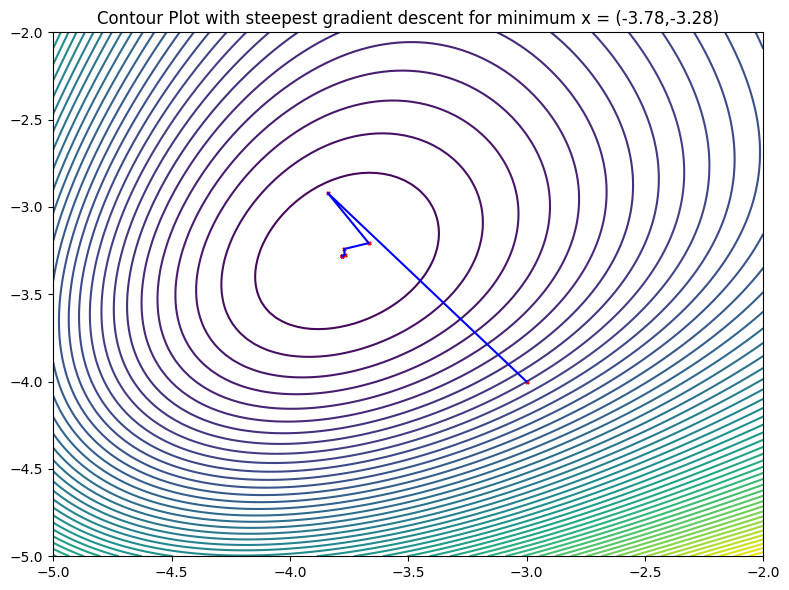

In [171]:
# Plotting intermediate steps for finding one minima (x4)
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 6))
x = []
y = []
z = []
for i in range(len(J_x4)):
  x.append(J_x4[i][0])
  y.append(J_x4[i][1])
  z.append(J(J_x4[i]))
#x,y = np.meshgrid(x,y)
def fun(x1,x2):
  return (x1**2 + x2 - 11)**2 + (x1 + x2**2 - 7)**2
a = np.linspace(-5,-2,100)
b = np.linspace(-5,-2,100)
a,b = np.meshgrid(a,b)
z = fun(a,b)
plt.contour(a, b, z, levels = 50)
plt.scatter(x,y, s=5, color='red', marker='x')
plt.plot(x,y, color = 'blue')

plt.title(f'Contour Plot with steepest gradient descent for minimum x = ({round(x4[0],2)},{round(x4[1],2)})')

# Show plot
plt.tight_layout()
plt.show()

In [161]:
# Part b

In [50]:
# interval halving method for line search
def interval_halving(J, a, b, tol = 0.0001):
  # step 1
  w_m = (a+b)/2
  L = b-a
  while abs(L) > tol:
    # step 2
    w1 = a + L/4
    w2 = b - L/4
    J_w_m = J(w_m)
    J_w1 = J(w1)
    J_w2 = J(w2)
    # step 3
    if J_w1 < J_w_m:
      b = w_m
      w_m = w1
    # step 4
    elif J_w2 < J_w_m:
      a = w_m
      w_m = w2
    else:
      a = w1
      b = w2
    L = b-a
  return w_m

In [129]:
# (b) Steepest descent using variable alpha (line search to determine alpha)
def sgd2(J, dJ, init_pt, tol=0.001):
  curr_point = init_pt
  #alpha = init_alpha
  gradJ = dJ(curr_point)
  intd_steps = [curr_point]     # List to store intermediate steps
  while np.linalg.norm(gradJ)>tol:
    J_val = lambda alpha: J(curr_point - alpha*gradJ)
    # finding alpha that minimises J along the line using interval halving
    alpha = interval_halving(J_val, 0, 4)
    curr_point = curr_point - alpha*gradJ
    gradJ = dJ(curr_point)
    intd_steps.append(curr_point)
  return curr_point, intd_steps

In [142]:
x1, J_x1 = sgd2(J, dJ, [1,1])

In [143]:
print(f"The minimum point is at: {x1}" )

The minimum point is at: [2.99998852 2.00002166]


In [146]:
x2, J_x2 = sgd2(J, dJ, [-3,-2])

In [147]:
print(f"The minimum point is at: {x2}" )

The minimum point is at: [-3.77931111 -3.28318494]


In [150]:
x3, J_x3 = sgd2(J, dJ, [-2,3])

In [151]:
print(f"The minimum point is at: {x3}" )

The minimum point is at: [-2.8051154   3.13131192]


In [154]:
x4, J_x4 = sgd2(J, dJ, [3,0])

In [155]:
print(f"The minimum point is at: {x4}" )

The minimum point is at: [ 3.58443022 -1.84811175]


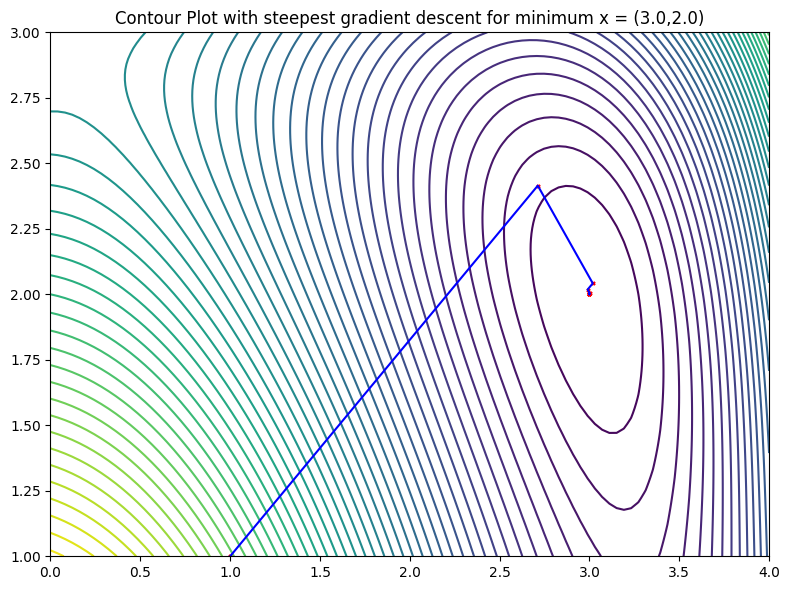

In [160]:
# Plotting intermediate steps for finding one minima (x1)
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 6))
x = []
y = []
z = []
for i in range(len(J_x1)):
  x.append(J_x1[i][0])
  y.append(J_x1[i][1])
  z.append(J(J_x1[i]))
def fun(x1,x2):
  return (x1**2 + x2 - 11)**2 + (x1 + x2**2 - 7)**2
a = np.linspace(0,4,100)
b = np.linspace(1,3,100)
a,b = np.meshgrid(a,b)
z = fun(a,b)
plt.contour(a, b, z, levels = 50)
plt.scatter(x,y, s=5, color='red', marker='x')
plt.plot(x,y, color = 'blue')

plt.title(f'Contour Plot with steepest gradient descent for minimum x = ({round(x1[0],2)},{round(x1[1],2)})')

# Show plot
plt.tight_layout()
plt.show()